In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Load the data with the correct encoding
df = pd.read_csv('d:/ProjectExample/loaddata/opendata_ตัวอย่างข้อมูล_เงินฝาก.csv', encoding='cp874')

df

,seqnum,sex,province,age,DEP_TOTAL
0,1,ชาย,กรุงเทพมหานคร,168,1043.83
1,2,หญิง,สมุทรสาคร,37,13159.08
2,3,หญิง,บุรีรัมย์,57,31476.22
3,4,หญิง,บุรีรัมย์,73,90.38
4,5,หญิง,บุรีรัมย์,50,14185.05
...,...,...,...,...,...
995,996,ชาย,บุรีรัมย์,51,16170.78
996,997,ชาย,บุรีรัมย์,43,6742.55
997,998,ชาย,บุรีรัมย์,50,4020.10
998,999,หญิง,บุรีรัมย์,63,6484.17


In [11]:
from sklearn.preprocessing import LabelEncoder

# Convert 'sex' column to numerical values
df['sex'] = df['sex'].map({'ชาย': 1, 'หญิง': 0})

# Convert 'province' column to numerical values using label encoding
label_encoder = LabelEncoder()
df['province'] = label_encoder.fit_transform(df['province'])

df

,seqnum,sex,province,age,DEP_TOTAL
0,1,1,0,168,1043.83
1,2,0,18,37,13159.08
2,3,0,10,57,31476.22
3,4,0,10,73,90.38
4,5,0,10,50,14185.05
...,...,...,...,...,...
995,996,1,10,51,16170.78
996,997,1,10,43,6742.55
997,998,1,10,50,4020.10
998,999,0,10,63,6484.17


In [12]:
# Select all columns except 'seqnum'
data = df.drop(columns=['seqnum'])
data.head()

,sex,province,age,DEP_TOTAL
0,1,0,168,1043.83
1,0,18,37,13159.08
2,0,10,57,31476.22
3,0,10,73,90.38
4,0,10,50,14185.05


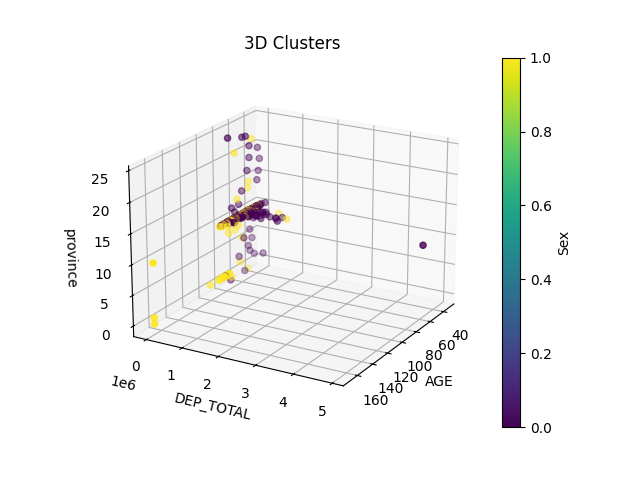

In [18]:
%matplotlib widget

# Select all columns except 'seqnum' for clustering
data_for_clustering = df.drop(columns=['seqnum'])

# Number of clusters
k = 5

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k)

# Fit the model
kmeans.fit(data_for_clustering)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original data
df['Cluster'] = labels

# Save the clustered data to a new CSV file
df.to_csv('clustered_opendata.csv', index=False)

# Plot the clusters in 3D (assuming 3D data for simplicity)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['age'], df['DEP_TOTAL'], df['province'], c=df['sex'], cmap='viridis')
ax.set_xlabel('AGE')
ax.set_ylabel('DEP_TOTAL')
ax.set_zlabel('province')
ax.set_title('3D Clusters')

cbar = plt.colorbar(sc)
cbar.set_label('Sex')

ax.view_init(elev=20, azim=30)


plt.show()

In [ ]:
cd